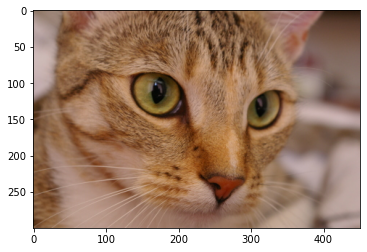

In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 5
# @Ahmet Galip Sengun - 904261
# November 2022

import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2


# Load image
img = skimage.data.chelsea()

plt.imshow(img)

# Task 1

Text(0.5, 1.0, '3% noised image')

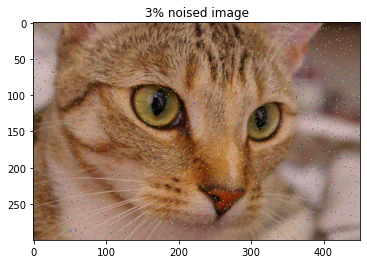

In [2]:
import random

def apply_noise(img, p):
    noised_img = img.copy()
    N = int(img.shape[0] * img.shape[1] * p)
    for i in range(N):
        randx = random.randrange(img.shape[1])
        randy = random.randrange(img.shape[0])
        randomRGB = random.sample(range(256), 3)
        noised_img[randy, randx] = randomRGB
    return noised_img
    
p = 0.03
noised_img = apply_noise(img, p)
plt.imshow(noised_img)
plt.title(f"{p*100:.0f}% noised image")

# Task 2

In [3]:
def nmse(img1, img2):
    
    img1, img2 = img1.astype(np.float64), img2.astype(np.float64)
    up, down = 0, 0
    for i in range(3):
        up += np.sum(np.square(img1[:,:,i] - img2[:,:,i])) 
        down += np.sum(np.square(img1[:,:,i]))
    return up/down

In [4]:
nmse(img, noised_img)

0.014417632235473116

# Task 3

In [5]:
def extend_image(img):
    bordersize = 1
    border = cv2.copyMakeBorder(
        img,
        top=bordersize,
        bottom=bordersize,
        left=bordersize,
        right=bordersize,
        borderType=cv2.BORDER_REPLICATE,
    )
    return border

In [6]:
def dist(a, b):
    squared_dist = np.sum((a-b)**2, axis=0)
    dist = np.sqrt(squared_dist)
    return dist

In [7]:
def VMF(img, i, j):
    
    """[
        p1
    p4  p0  p2
        p3
           [0,1]
    [1,0]  [1,1]  [1,2]
           [2,1]
    ]
    """
    p0 = img[i+1,j+1]
    p1 = img[i,j+1]
    p2 = img[i+1,j+2]
    p3 = img[i+2,j+1]
    p4 = img[i+1,0]
    
    d01 = dist(p0, p1)
    d02 = dist(p0, p2)
    d03 = dist(p0, p3)
    d04 = dist(p0, p4)
    d12 = dist(p1, p2)
    d13 = dist(p1, p3)
    d14 = dist(p1, p4)
    d23 = dist(p2, p3)
    d24 = dist(p2, p4)
    d34 = dist(p3, p4)
    
    sum0 = d01 + d02 + d03 + d04
    sum1 = d01 + d12 + d13 + d14
    sum2 = d02 + d12 + d23 + d24
    sum3 = d03 + d13 + d23 + d34
    sum4 = d04 + d14 + d24 + d34
    summin = sum0
    
    if(summin>sum1):
        p0 = p1
        summin = sum1
    if(summin>sum2):
        p0 = p2
        summin = sum2
    if(summin>sum3):
        p0 = p3
        summin = sum3
    if(summin>sum4):
        p0 = p4
        
    return p0*255
    
    """sum0 = ||p0 - p1|| + ||p0 - p2|| + ||p0 - p3|| + ||p0 - p4||;
    sum1 = ||p0 - p1|| + ||p1 - p2|| + ||p1 - p3|| + ||p1 - p4||;
    sum2 = ||p0 - p2|| + ||p1 - p2|| + ||p2 - p3|| + ||p2 - p4||;
    sum3 = ||p0 - p3|| + ||p1 - p3|| + ||p2 - p3|| + ||p3 - p4||;
    sum4 = ||p0 - p4|| + ||p1 - p4|| + ||p2 - p4|| + ||p3 - p4||;
    summin = sum0;
    if(summin>sum1){ p0 = p1; summin = sum1; } 
    if(summin>sum2){ p0 = p2; summin = sum2; }
    if(summin>sum3){ p0 = p3; summin = sum3; }
    if(summin>sum4){ p0 = p4;}"""

In [8]:
def FMVMF(img, i, j):
    p0 = img[i+1,j+1]
    p1 = img[i,j+1]
    p2 = img[i+1,j+2]
    p3 = img[i+2,j+1]
    p4 = img[i+1,0]

    d01 = dist(p0, p1)
    d02 = dist(p0, p2)
    d03 = dist(p0, p3)
    d04 = dist(p0, p4)
    d12 = dist(p1, p2)
    d13 = dist(p1, p3)
    d14 = dist(p1, p4)
    d23 = dist(p2, p3)
    d24 = dist(p2, p4)
    d34 = dist(p3, p4)
    
    beta = 0.75
    
    sum0 = d01 + d02 + d03 + d04 - beta
    sum1 = d12 + d13 + d14
    sum2 = d12 + d23 + d24
    sum3 = d13 + d23 + d34
    sum4 = d14 + d24 + d34
    
    summin = sum1
    ptmp = p1
    
    if(summin>sum2):
        ptmp = p2
        summin = sum2
    if(summin>sum3):
        ptmp = p3
        summin = sum3
    if(summin>sum4):
        ptmp = p4
        summin = sum4
    if(sum0-beta<summin):
        ptmp = p0
        
    return ptmp*255

In [9]:
def PNN_VMF(img, i, j):
    
    p0 = img[i+1,j+1]
    p1 = img[i,j+1]
    p2 = img[i+1,j+2]
    p3 = img[i+2,j+1]
    p4 = img[i+1,0]

    d01 = dist(p0, p1)
    d02 = dist(p0, p2)
    d03 = dist(p0, p3)
    d04 = dist(p0, p4)
    d12 = dist(p1, p2)
    d13 = dist(p1, p3)
    d14 = dist(p1, p4)
    d23 = dist(p2, p3)
    d24 = dist(p2, p4)
    d34 = dist(p3, p4)
    
    beta = 0.75
    
    sum0 = d01 + d02 + d03 + d04 - beta
    sum1 = d12 + d13 + d14
    sum2 = d12 + d23 + d24
    sum3 = d13 + d23 + d34
    sum4 = d14 + d24 + d34
    
    summin = sum1
    ptmp = p1
    
    howmanygt=0
    
    if(sum0>sum1):
        howmanygt+=1
    if(sum0>sum2):
        howmanygt+=1
    if(sum0>sum3):
        howmanygt+=1
    if(sum0>sum4):
        howmanygt+=1
    if(howmanygt<2):
        return p0
        
    summin=sum1
    p0=p1
    
    if(summin>sum2):
        p0=p2
        summin=sum2
    if(summin>sum3):
        p0=p3
        summin=sum3
    if(summin>sum4):
        p0=p4
        
    return p0

In [10]:
def convole2d(img, method):
    extended = extend_image(img)
    output = img.copy()
    norm = (extended - np.min(extended)) / (np.max(extended) - np.min(extended))

    if method == "VMF":
        for i in range(len(norm)-2):
            for j in range(len(norm[0])-2):
                temp = VMF(norm, i, j)
                output[i,j] = temp
        return output
    elif method == "FMVMF":
        for i in range(len(norm)-2):
            for j in range(len(norm[0])-2):
                temp = FMVMF(norm, i, j)
                output[i,j] = temp
        return output
    elif method == "PNN_VMF":
        for i in range(len(norm)-2):
            for j in range(len(norm[0])-2):
                norm[i,j] = FMVMF(norm, i, j)
                output[i,j] = norm[i,j]
        return output*255
    else:
        print("no such method")

Text(0.5, 1.0, '20% noise, nmse = 0.082')

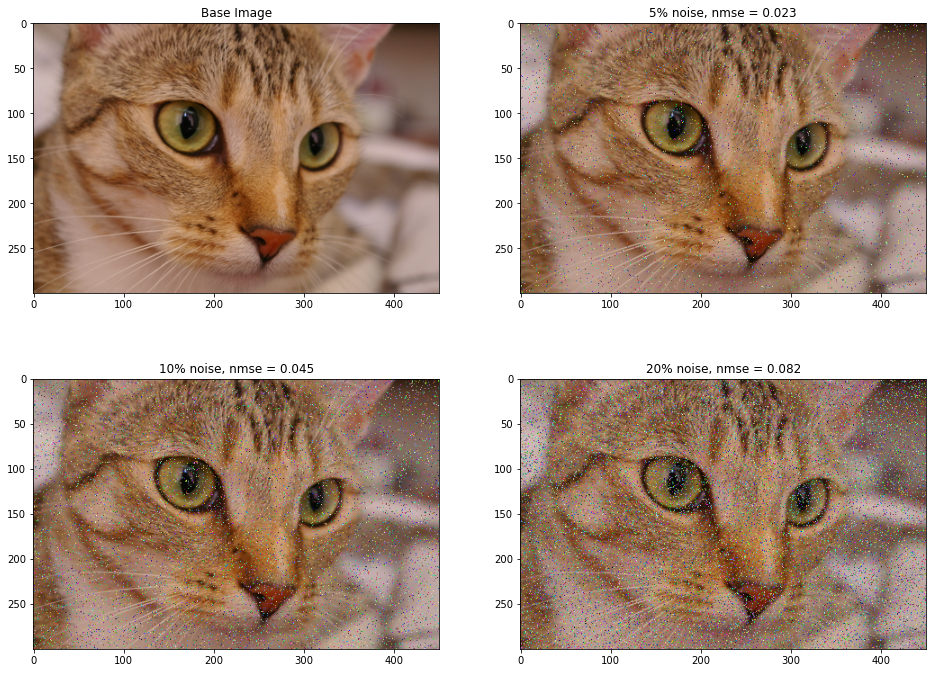

In [11]:
from skimage.util import invert

p1, p2, p3 = 0.05, 0.1, 0.2

n05 = apply_noise(img, p1)
n10 = apply_noise(img, p2)
n20 = apply_noise(img, p3)

fig, ax = plt.subplots(2, 2, figsize = (16,12))
ax[0, 0].imshow(img)
ax[0, 0].set_title(f"Base Image")

ax[0, 1].imshow(n05)
ax[0, 1].set_title(f"{p1*100:.0f}% noise, nmse = {nmse(n05, img):.3f}")

ax[1, 0].imshow(n10)
ax[1, 0].set_title(f"{p2*100:.0f}% noise, nmse = {nmse(n10, img):.3f}")

ax[1, 1].imshow(n20)
ax[1, 1].set_title(f"{p3*100:.0f}% noise, nmse = {nmse(n20, img):.3f}")


Text(0.5, 1.0, '%20 - PNN_VMF, nmse = 0.028')

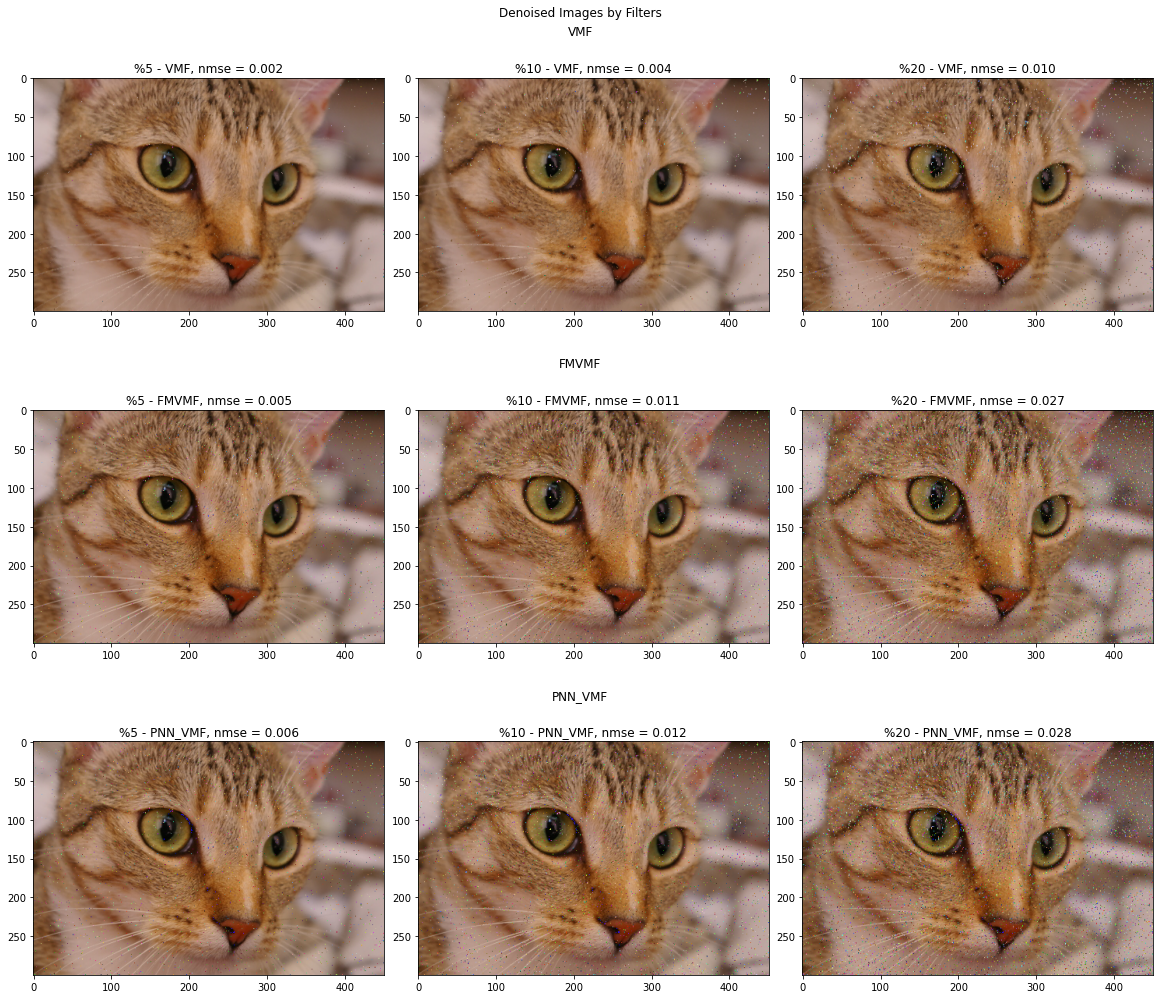

In [12]:
fig = plt.figure(constrained_layout=True, figsize=(16,14))
fig.suptitle('Denoised Images by Filters')

(subfig1, subfig2, subfig3) = fig.subfigures(3, 1) 
(ax1, ax2, ax3) = subfig1.subplots(1, 3)       
(ax4, ax5, ax6) = subfig2.subplots(1, 3)
(ax7, ax8, ax9) = subfig3.subplots(1, 3) 
#########################################################
method = "VMF"
subfig1.suptitle(method)
img_ = convole2d(n05, method)
ax1.imshow((img_).astype(np.uint8))
ax1.set_title(f"%5 - {method}, nmse = {nmse(img_, img):.3f}")

img_ = convole2d(n10, method)
ax2.imshow((img_).astype(np.uint8))
ax2.set_title(f"%10 - {method}, nmse = {nmse(img_, img):.3f}")

img_ = convole2d(n20, method)
ax3.imshow((img_).astype(np.uint8))
ax3.set_title(f"%20 - {method}, nmse = {nmse(img_, img):.3f}")

##########################################################
method = "FMVMF"
subfig2.suptitle(method)
img_ = convole2d(n05, method)
ax4.imshow((img_).astype(np.uint8))
ax4.set_title(f"%5 - {method}, nmse = {nmse(img_, img):.3f}")

img_ = convole2d(n10, method)
ax5.imshow((img_).astype(np.uint8))
ax5.set_title(f"%10 - {method}, nmse = {nmse(img_, img):.3f}")

img_ = convole2d(n20, method)
ax6.imshow((img_).astype(np.uint8))
ax6.set_title(f"%20 - {method}, nmse = {nmse(img_, img):.3f}")

###########################################################
method = "PNN_VMF"
subfig3.suptitle(method)
img_ = convole2d(n05, method)
inverted = invert(img_)
ax7.imshow((inverted).astype(np.uint8))
ax7.set_title(f"%5 - {method}, nmse = {nmse(inverted, img):.3f}")

img_ = convole2d(n10, method)
inverted = invert(img_)
ax8.imshow((inverted).astype(np.uint8))
ax8.set_title(f"%10 - {method}, nmse = {nmse(inverted, img):.3f}")

img_ = convole2d(n20, method)
inverted = invert(img_)
ax9.imshow((inverted).astype(np.uint8))
ax9.set_title(f"%20 - {method}, nmse = {nmse(inverted, img):.3f}")   

# Task 4